In [1]:
# Uploading and displaying the file

import pandas as pd
df = pd.read_csv('/content/Hotel_Bookings_Python.csv')
df.head()

,Customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Booking_Agent,Booking_Company,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Required_Car_Parking_Spaces,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [2]:
# Pre-processing data by finding NaN values

df.isna().sum()

Customer_ID                             0
Hotel_Name                              0
Is_Canceled                             0
Lead_Time                               0
Arrival_Date_Year                       0
Arrival_Date_Month                      0
Arrival_Date_Week_Number                0
Arrival_Date_Day_Of_Month               0
Stays_In_Weekend_Nights                 0
Stays_In_Week_Nights                    0
No_Of_Adults                            0
No_Of_Children                          4
No_Of_Babies                            0
Type_Of_Meal                            0
Country                               488
Market_Segment                          0
Distribution_Channel                    0
Is_Repeated_Guest                       0
Previous_Cancellations                  0
Previous_Bookings_Not_Cancelled         0
Reserved_Room_Type                      0
Assigned_Room_Type                      0
Booking_Changes                         0
Deposit_Type                      

As we can see, Booking_Agent and Booking_Company columns have a significant amount of null values and it is best to drop the said columns as they would not have any kind of effect on model learning tasks. We also drop other rows which have null values.

In [3]:
# Dropping Booking_Agent and Booking_Company

df.drop(columns = ['Booking_Company', 'Booking_Agent'], inplace = True)
df.head()

,Customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Required_Car_Parking_Spaces,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
# Replacing values for better predictability

replace_values = {'No_Of_Children': 0.0, 'Country': 'Unknown'}
df = df.fillna(replace_values)
df['Type_Of_Meal'].replace('Undefined', 'SC', inplace = True)
no_guests = list(df.loc[df['No_Of_Adults'] + df['No_Of_Babies'] + df['No_Of_Children'] == 0].index)
df.drop(df.index[no_guests], inplace = True)

In [5]:
# Dropping the other NaN values

df.dropna(inplace = True)

In [6]:
# Displaying the cleaned file

print(df.shape)
df.head()

(106618, 31)


,Customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Required_Car_Parking_Spaces,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


## **EDA**

**(1) Displaying a sample map to see the geographical spread of the origin countries from where guests come to visit the hotel.**

In [ ]:
# Checking the location data to plot using leaflet

from collections import Counter

location_list = df['Country'].to_list()
location_list = list(set(location_list))
print(Counter(location_list))

Counter({'RUS': 1, 'MWI': 1, 'PYF': 1, 'DEU': 1, 'MRT': 1, 'NZL': 1, 'STP': 1, 'EST': 1, 'GIB': 1, 'TUR': 1, 'CIV': 1, 'ETH': 1, 'UKR': 1, 'JOR': 1, 'SWE': 1, 'NIC': 1, 'QAT': 1, 'JPN': 1, 'DJI': 1, 'FJI': 1, 'SMR': 1, 'ARG': 1, 'HRV': 1, 'TGO': 1, 'OMN': 1, 'NAM': 1, 'AUS': 1, 'IRQ': 1, 'KAZ': 1, 'MNE': 1, 'ITA': 1, 'FIN': 1, 'SGP': 1, 'HND': 1, 'IMN': 1, 'KEN': 1, 'HKG': 1, 'DNK': 1, 'IDN': 1, 'VGB': 1, 'CHL': 1, 'TWN': 1, 'BDI': 1, 'BGD': 1, 'ZAF': 1, 'KWT': 1, 'PRT': 1, 'ATA': 1, 'CMR': 1, 'BOL': 1, 'CHE': 1, 'COM': 1, 'SAU': 1, 'MEX': 1, 'NPL': 1, 'PHL': 1, 'BHR': 1, 'SVN': 1, 'LAO': 1, 'TMP': 1, 'GRC': 1, 'MLI': 1, 'ROU': 1, 'IRL': 1, 'GHA': 1, 'SLV': 1, 'MLT': 1, 'MAC': 1, 'DOM': 1, 'TZA': 1, 'GAB': 1, 'LBN': 1, 'BEN': 1, 'SVK': 1, 'AUT': 1, 'ISL': 1, 'FRA': 1, 'LVA': 1, 'FRO': 1, 'LCA': 1, 'PAK': 1, 'KHM': 1, 'BRB': 1, 'MCO': 1, 'URY': 1, 'CN': 1, 'COL': 1, 'KNA': 1, 'AIA': 1, 'LBY': 1, 'MMR': 1, 'MOZ': 1, 'GGY': 1, 'ISR': 1, 'SYR': 1, 'MUS': 1, 'TJK': 1, 'LIE': 1, 'CRI': 1, 'P

In [ ]:
# Finding the co-ordinates of the locations

dict_country = {}
dict_country['IRL'] = [53.1424, 7.6921]
dict_country['SWE'] = [60.1282, 18.6435]
dict_country['GEO'] = [32.1656, 82.9001]
dict_country['MYT'] = [12.8275, 45.1662]
dict_country['PRT'] = [39.3999, 8.2245]
dict_country['GBR'] = [55.3781, 3.4360]
dict_country['ARE'] = [23.4241, 53.8478]
dict_country['TZA'] = [6.3690, 34.8888]
dict_country['CHE'] = [46.8182, 8.2275]
dict_country['HKG'] = [22.3193, 114.1694]

In [ ]:
# Plotting the coordinates using Folium library 
import folium
from folium.plugins import MarkerCluster

map = folium.Map(zoom_start = 13)
for key in dict_country:
  folium.Marker(dict_country[key], popup = key).add_to(map)

map

**(2) How many guests come from different countries?** 

We plot a pie chart to show the statistics of how many guests visit the hotel from different countries. This might be useful if the hotel is in need to expand their businesses to several other countries.

In [ ]:
# Grouping of number of guests by countries 

import plotly.express as pl

location_data_2 = pd.DataFrame(df.loc[df['Is_Canceled'] == 0]['Country'].value_counts())
# location_data_2.head()
location_data_2.rename(columns = {'Country': 'Number_Of_Guests'}, inplace = True)
n_guests = location_data_2['Number_Of_Guests'].sum()
location_data_2["Guests in %"] = round(location_data_2["Number_Of_Guests"] / n_guests * 100, 2)
location_data_2['Country'] = location_data_2.index
fig = pl.pie(location_data_2,
             values="Number_Of_Guests",
             names="Country",
             title="Per cent of guests coming from different countries",
             template="seaborn",
             color_discrete_sequence = pl.colors.sequential.RdBu)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# Showing a choropleth of the above chart

location_map = pl.choropleth(location_data_2,
                    locations = location_data_2.index,
                    color = location_data_2["Guests in %"], 
                    hover_name = location_data_2.index, 
                    color_continuous_scale=pl.colors.sequential.RdBu,
                    title="Per cent of guests coming from different countries")
location_map.show()

**(3)How many different market segments are present to make different kinds of payments to the hotel and resort?**

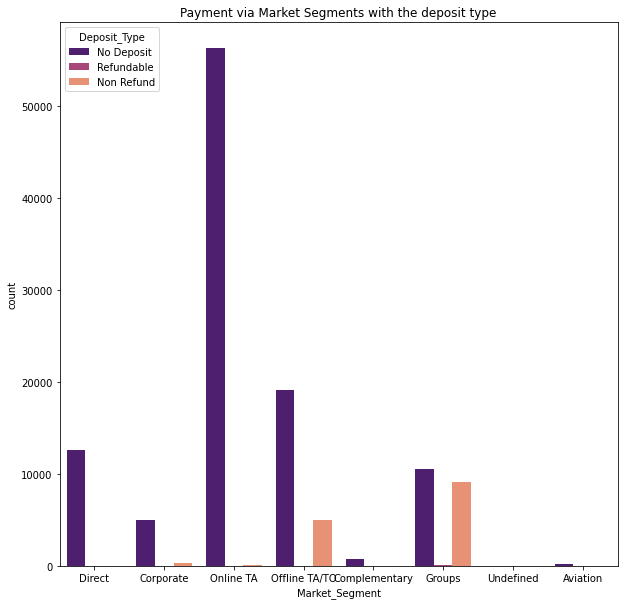

In [ ]:
# Plotting market segmentation distribution Vs Deposit Type

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.title('Payment via Market Segments with the deposit type')
axis = sns.countplot(x = 'Market_Segment', hue = 'Deposit_Type', palette = 'magma', data = df)

**(4) How many guests cancel across different market segments?**

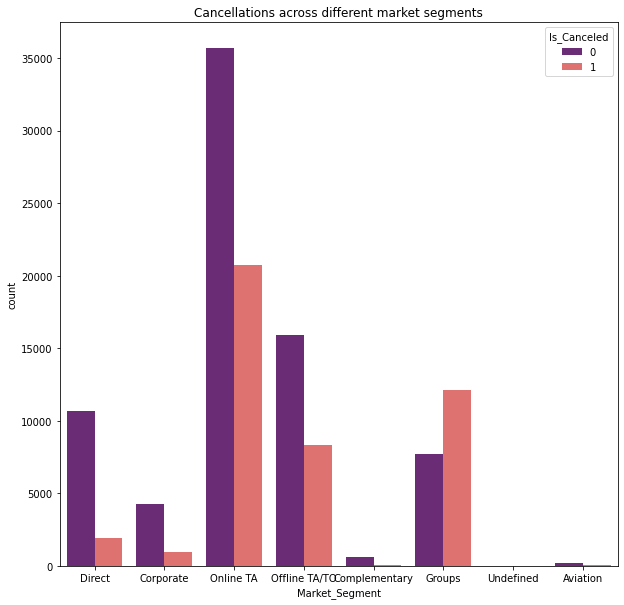

In [ ]:
# Plotting market segment distribution Vs number of cancellations

plt.figure(figsize = (10, 10))
plt.title('Cancellations across different market segments')
axis = sns.countplot(x = 'Market_Segment', hue = 'Is_Canceled', palette = 'magma', data = df)

**(5) How much do guests pay per night for the Resort Hotel?**

In [ ]:
resort = df.loc[(df["Hotel_Name"] == "Resort Hotel") & (df["Is_Canceled"] == 0)]
city = df.loc[(df["Hotel_Name"] == "City Hotel") & (df["Is_Canceled"] == 0)]

In [ ]:
resort["adr_pp"] = resort["Average_Daily_Rate"] / (resort["No_Of_Adults"] + resort["No_Of_Children"])
print("""From all non-canceled bookings, across all room types and meals, the average prices are: Resort hotel: {:.2f} € per night per person.""".format(resort["adr_pp"].mean()))

From all non-canceled bookings, across all room types and meals, the average prices are: Resort hotel: 47.49 € per night per person.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**(6) What is the distribution of the market segment?**

In [ ]:
# Plotting a pie chart to see the ditribution of different market segments

ms_list = df['Market_Segment'].value_counts()
figure = pl.pie(ms_list, values = ms_list.values, names = ms_list.index, title = 'Distribution of Market Segments')
figure.update_traces(rotation = 90, textinfo = 'percent+label')
figure.show()

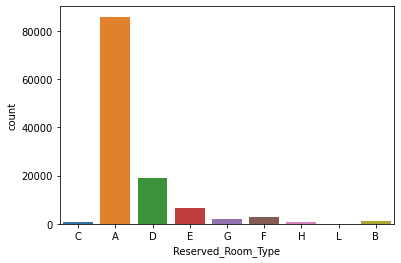

In [ ]:
# Reserved Room Type

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x = 'Reserved_Room_Type')
plt.show()

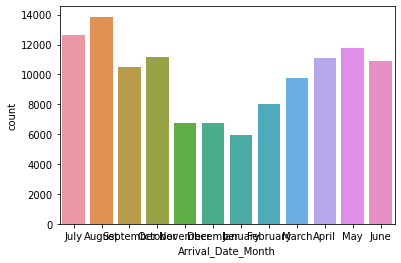

In [ ]:
# Arrival_Date_Month

sns.countplot(data=df, x = 'Arrival_Date_Month')
plt.show()

([<matplotlib.patches.Wedge at 0x7ff69bef7210>,
 [Text(-1.4027767426118636, 1.3973608733563605, 'Transient'),
  Text(1.2216065509900464, -1.5582289416443926, 'Transient-Party'),
  Text(1.9279948011265458, -0.45081708799579906, 'Group'),
  Text(1.9686216298885413, -0.21196433269534798, 'Contract')],
 [Text(-0.7651509505155619, 0.7621968400125602, '75.1%'),
  Text(0.6663308459945708, -0.8499430590787596, '21.0%'),
  Text(1.0516335278872067, -0.24590022981589038, '0.5%'),
  Text(1.0737936163028405, -0.11561690874291708, '3.4%')])

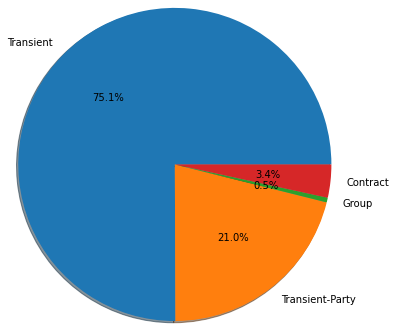

In [ ]:
# Customer_Type

customer_types = {}
customer_types = df.value_counts(df['Customer_Type'])
customer_x = ['Transient', 'Transient-Party', 'Group', 'Contract']
customer_y = [89613, 25120, 577, 4076]
myexplode = [0.2, 0.2, 0.2, 0.8, 0.8]
plt.pie(customer_y, labels = customer_x, radius=1.8, autopct='%0.01f%%', shadow=True)

## **PREDICTION OF CANCELLATIONS USING SEVERAL ALGORITHMS**

For a hotel management system to be succesfull, it is imperative that we find reasons for the cancellations happening so that we can resolve those issues and bring down the number of cancellations. First we find what features highly affect the cancellations.

In [ ]:
# Finding the categorical values

df.dtypes

Customer_ID                          int64
Hotel_Name                          object
Is_Canceled                          int64
Lead_Time                            int64
Arrival_Date_Year                    int64
Arrival_Date_Month                  object
Arrival_Date_Week_Number             int64
Arrival_Date_Day_Of_Month            int64
Stays_In_Weekend_Nights              int64
Stays_In_Week_Nights                 int64
No_Of_Adults                         int64
No_Of_Children                     float64
No_Of_Babies                         int64
Type_Of_Meal                        object
Country                             object
Market_Segment                      object
Distribution_Channel                object
Is_Repeated_Guest                    int64
Previous_Cancellations               int64
Previous_Bookings_Not_Cancelled      int64
Reserved_Room_Type                  object
Assigned_Room_Type                  object
Booking_Changes                      int64
Deposit_Typ

In [ ]:
# Finding the correlation between variables

is_canceled_corr = df.corr()['Is_Canceled']
is_canceled_corr.abs().sort_values(ascending = False)[1:]

Lead_Time                          0.292876
Customer_ID                        0.241737
Total_Of_Special_Requests          0.234877
Required_Car_Parking_Spaces        0.195701
Booking_Changes                    0.144832
Previous_Cancellations             0.110139
Is_Repeated_Guest                  0.083745
No_Of_Adults                       0.058182
Previous_Bookings_Not_Cancelled    0.057365
Days_In_Waiting_List               0.054301
Average_Daily_Rate                 0.046492
No_Of_Babies                       0.032569
Stays_In_Week_Nights               0.025542
Arrival_Date_Year                  0.016622
Arrival_Date_Week_Number           0.008315
Arrival_Date_Day_Of_Month          0.005948
No_Of_Children                     0.004851
Stays_In_Weekend_Nights            0.001323
Name: Is_Canceled, dtype: float64

The 5 most important features that have the highest effects on 'Is_Canceled' response variable are Reservation_Status, Deposit_Type, Lead_Time, Country and Total_Of_Special_Requests made. We do not consider Customer_ID to be a factor here because it is spurious and it will have no effect in modelling.

In [ ]:
# Converting categorical values to numeric values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_fts = ['Hotel_Name', 'Arrival_Date_Month', 'Type_Of_Meal', 'Market_Segment', 'Distribution_Channel', 'Reserved_Room_Type', 'Deposit_Type', 'Customer_Type']
num_fts = ['Lead_Time', 'Arrival_Date_Week_Number', 'Arrival_Date_Day_Of_Month', 'Stays_In_Week_Nights', 'No_Of_Adults', 'No_Of_Children', 'No_Of_Babies', 'Is_Repeated_Guest', 'Previous_Cancellations', 'Previous_Bookings_Not_Cancelled', 'Required_Car_Parking_Spaces', 'Total_Of_Special_Requests', 'Average_Daily_Rate']
total_fts = cat_fts + num_fts
X = df.drop(columns = ['Is_Canceled'], axis = 1)[total_fts]
y = df['Is_Canceled']

# We use a pipeline to transform the categorical and numerical values

cat_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
num_transformer = SimpleImputer(strategy = 'constant')
prestep = ColumnTransformer(transformers = [('no', num_transformer, num_fts), ('cat', cat_transformer, cat_fts)])

In [ ]:
# TESTING WITH DIFFERENT MODELS

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 80)

models = [('RF', RandomForestClassifier(random_state = 80)), 
          ('XGB', XGBClassifier(random_state = 80)), 
          ('LR', LogisticRegression(random_state = 80)), 
          ('DT', DecisionTreeClassifier(random_state = 80)),
          ('GNB', GaussianNB())]

# Applying cross validation to get the best accuracy across 5 folds

split = KFold(n_splits = 5, shuffle = True, random_state = 80)
for title, model in models:
  model_steps = Pipeline(steps = [('pre-processing', prestep), ('model', model)])
  cv = cross_val_score(model_steps, X, y, cv = split, scoring = 'accuracy')
  mean = round(np.mean(cv), 3)
  print('The scores of the {0} model:'.format(title))
  print('The mean of the accuracy values across the folds is: ', mean)
  model_steps.fit(X_train, y_train)
  y_pred = model_steps.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('The test accuracy score of the model {0} is {1}'.format(title, accuracy))

The scores of the RF model:
The mean of the accuracy values across the folds is:  0.862
The test accuracy score of the model RF is 0.8566922793007415
The scores of the XGB model:
The mean of the accuracy values across the folds is:  0.814
The test accuracy score of the model XGB is 0.8127034191188807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

The scores of the LR model:
The mean of the accuracy values across the folds is:  0.796


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The test accuracy score of the model LR is 0.7934100593899943
The scores of the DT model:
The mean of the accuracy values across the folds is:  0.821
The test accuracy score of the model DT is 0.8148173002717847
The scores of the GNB model:
The mean of the accuracy values across the folds is:  0.607
The test accuracy score of the model GNB is 0.6163809012515519


In [ ]:
# Checking the distribution of the response variable

df['Is_Canceled'].value_counts()

0    75011
1    44199
Name: Is_Canceled, dtype: int64

From the above models, we find that RandomForestClassifier is the best model as it has the highest accuracy of approximately 86%. The accuracy of the other models are:


1.   XGBoost: about 82%
2.   Logistic Regression: about 79%
3.   Decision Tree Classifier: about 82%
4.   Gaussian Naive Bayes: about 62%

RandomForestClassifier works better than the other models mainly because of its randomness. We will try to tune the parameters in efforts to increase the accuracy.

In [ ]:
# Hyperparameter tuning to see if the results increase

n_estimators = [50, 100, 150, 200, 250, 300]
max_features = range(2, 10)
dict_temp = {}
for i in n_estimators:
  for j in max_features:
    model_rf = RandomForestClassifier(n_estimators = i, max_features = j, random_state = 80)
    split = KFold(n_splits = 5, shuffle = True, random_state = 80)
    model_pipe = Pipeline(steps=[('preprocessor', prestep),
                              ('model', model_rf)])
    cv = cross_val_score(model_pipe, X, y, cv=split, scoring="accuracy",)
    mean = round(np.mean(cv), 4)
    print('The accuracy of the model with {0} estimators and {1} max_features is: {2}'.format(i, j, mean))
    dict_temp[mean] = [i, j]
  
  print(dict_temp)

The accuracy of the model with 50 estimators and 2 max_features is: 0.8578
The accuracy of the model with 50 estimators and 3 max_features is: 0.8583
The accuracy of the model with 50 estimators and 4 max_features is: 0.8583
The accuracy of the model with 50 estimators and 5 max_features is: 0.8601
The accuracy of the model with 50 estimators and 6 max_features is: 0.8609
The accuracy of the model with 50 estimators and 7 max_features is: 0.8608
The accuracy of the model with 50 estimators and 8 max_features is: 0.861
The accuracy of the model with 50 estimators and 9 max_features is: 0.8612
{0.8578: [50, 2], 0.8583: [50, 4], 0.8601: [50, 5], 0.8609: [50, 6], 0.8608: [50, 7], 0.861: [50, 8], 0.8612: [50, 9]}
The accuracy of the model with 100 estimators and 2 max_features is: 0.8579
The accuracy of the model with 100 estimators and 3 max_features is: 0.8588
The accuracy of the model with 100 estimators and 4 max_features is: 0.8597
The accuracy of the model with 100 estimators and 5 ma

In [ ]:
# Finding the best parameters

import collections

sorted_dict_temp = collections.OrderedDict(sorted(dict_temp.items()))
print(sorted_dict_temp)

OrderedDict([(0.8578, [50, 2]), (0.8579, [100, 2]), (0.8582, [300, 2]), (0.8583, [250, 2]), (0.8588, [100, 3]), (0.8592, [150, 3]), (0.8594, [300, 3]), (0.8596, [250, 3]), (0.8597, [200, 3]), (0.8599, [150, 4]), (0.86, [250, 4]), (0.8601, [200, 4]), (0.8602, [300, 4]), (0.8608, [50, 7]), (0.8609, [50, 6]), (0.861, [50, 8]), (0.8611, [200, 5]), (0.8612, [100, 6]), (0.8613, [300, 5]), (0.8614, [250, 5]), (0.8617, [150, 6]), (0.8618, [250, 6]), (0.8619, [300, 6]), (0.8622, [150, 7]), (0.8623, [200, 9]), (0.8624, [200, 8]), (0.8625, [250, 8]), (0.8626, [250, 7]), (0.8627, [300, 8]), (0.8628, [300, 9])])


In [ ]:
# Modelling with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier

opt_model_rf = RandomForestClassifier(n_estimators = 300 , max_features = 9, random_state = 80)
split = KFold(n_splits = 5, shuffle = True, random_state = 80)
model_pipe = Pipeline(steps=[('pre-processing', prestep),
                              ('model', opt_model_rf)])
cv = cross_val_score(model_pipe, X, y, cv=split, scoring="accuracy")
mean = round(np.mean(cv), 4)
print('The accuracy of the optimized model with 300 estimators and 9 max_features is: ', mean)

The accuracy of the optimized model with 300 estimators and 9 max_features is:  0.8628


## **DASHBOARD CREATION FOR USER INTERFACE**

In [7]:
df_dash = df
df_dash['Target'] = ['Canceled' if typ==1 else 'Not Canceled' for typ in df_dash['Is_Canceled']]

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

def create_figure(plot1_f1):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,10))
        specs = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, 0]) ## First Row First Column

        ## First Graph -  Bar chart
        ax1.hist(df_dash[plot1_f1], color="tab:orange", )
        ax1.set_ylabel(plot1_f1)
        ax1.set_title("Distribution".format(plot1_f1))

        plt.close(fig)
        return fig

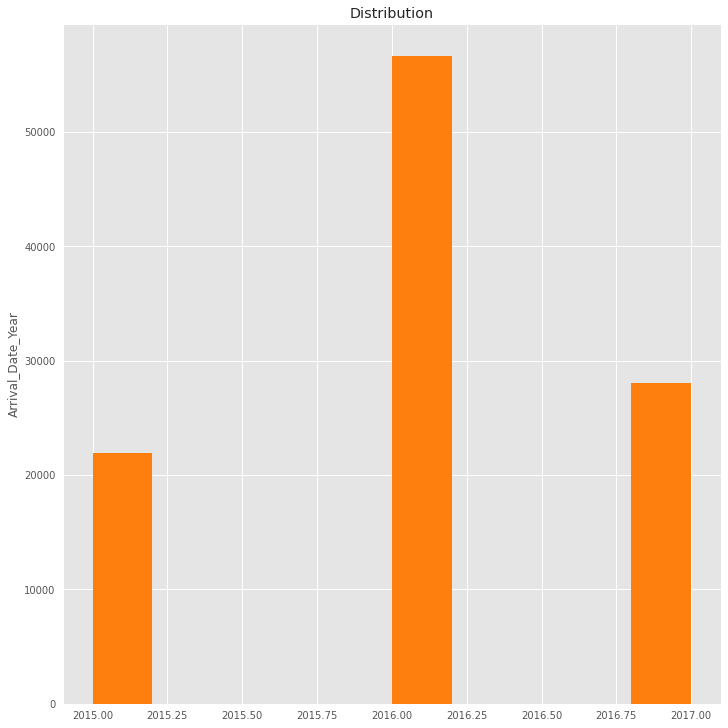

In [8]:
create_figure("Arrival_Date_Year")

Column
    [0] Column
        [0] Select(name='plot1_f1', options=['Customer_ID', ...], value='Customer_ID')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
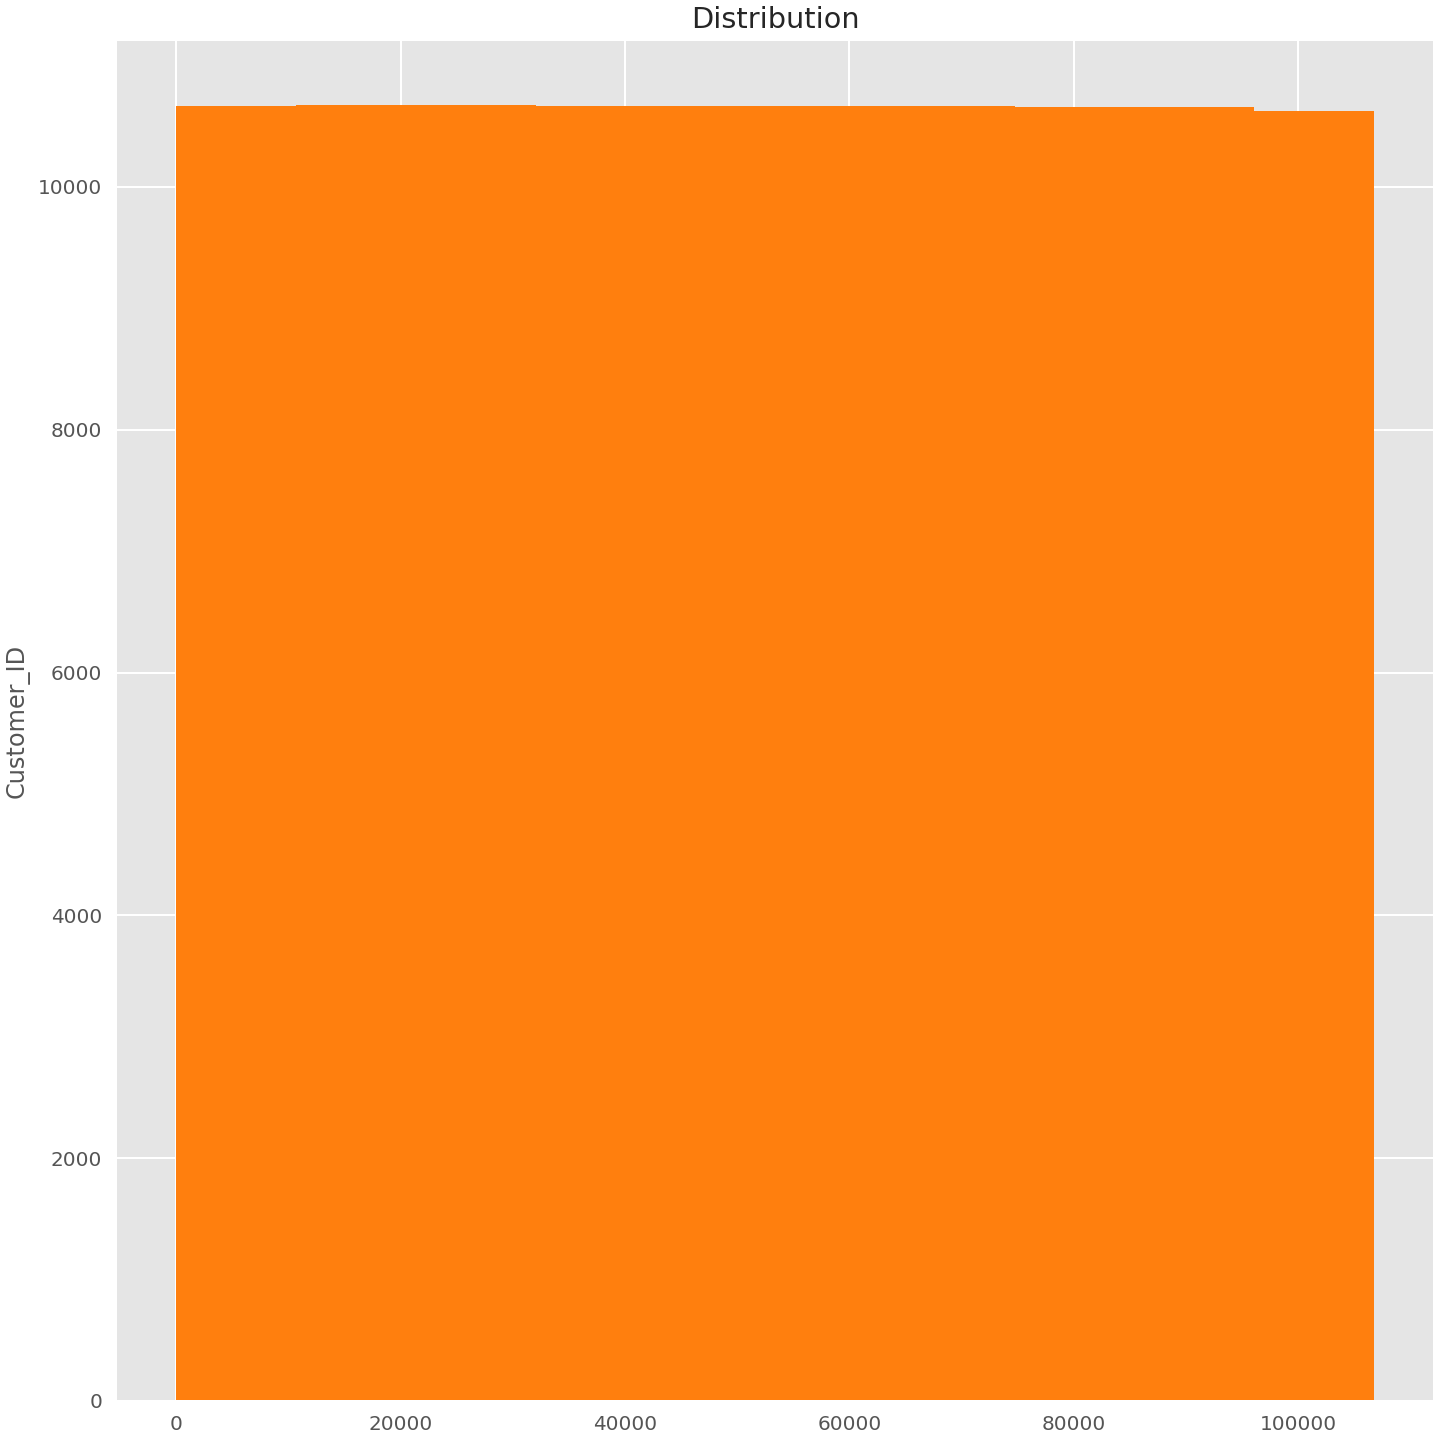

In [9]:
import panel as pn
pn.extension()

features = df_dash.drop(columns = ['Is_Canceled'], axis = 1)
kw = dict(plot1_f1 = features.columns)

dash1 = pn.interact(create_figure, **kw)
dash1

In [10]:
import matplotlib.gridspec as gridspec

def create_figure1(plot1_f1):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,10))
        specs = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, 0]) ## First Row First Column

        ## Second Graph -  Bar chart
        ax1.boxplot(df_dash[plot1_f1], patch_artist = True)
        ax1.set_ylabel(plot1_f1)
        ax1.set_title("Box Plot - Distribution".format(plot1_f1))

        plt.close(fig)
        return fig

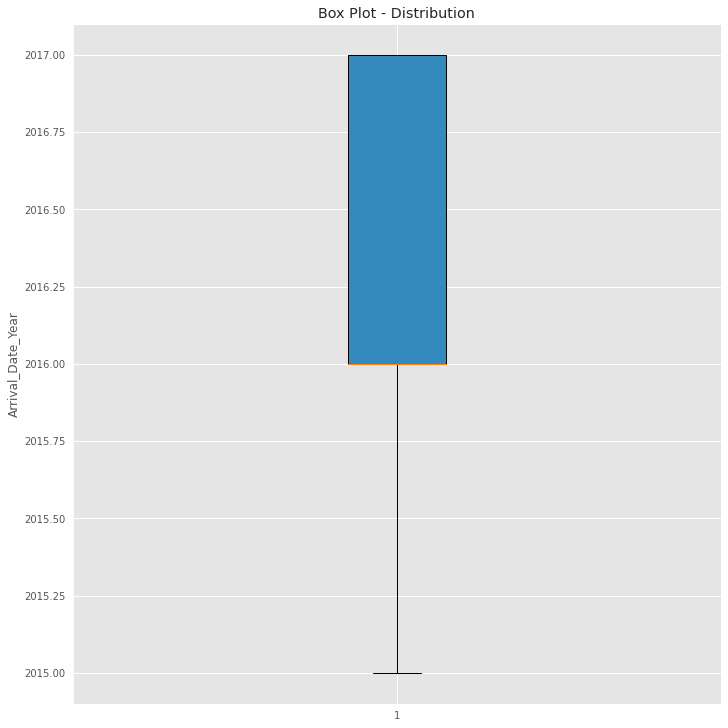

In [11]:
create_figure1("Arrival_Date_Year")

Column
    [0] Column
        [0] Select(name='plot1_f1', options=['Customer_ID', ...], value='Customer_ID')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00112')
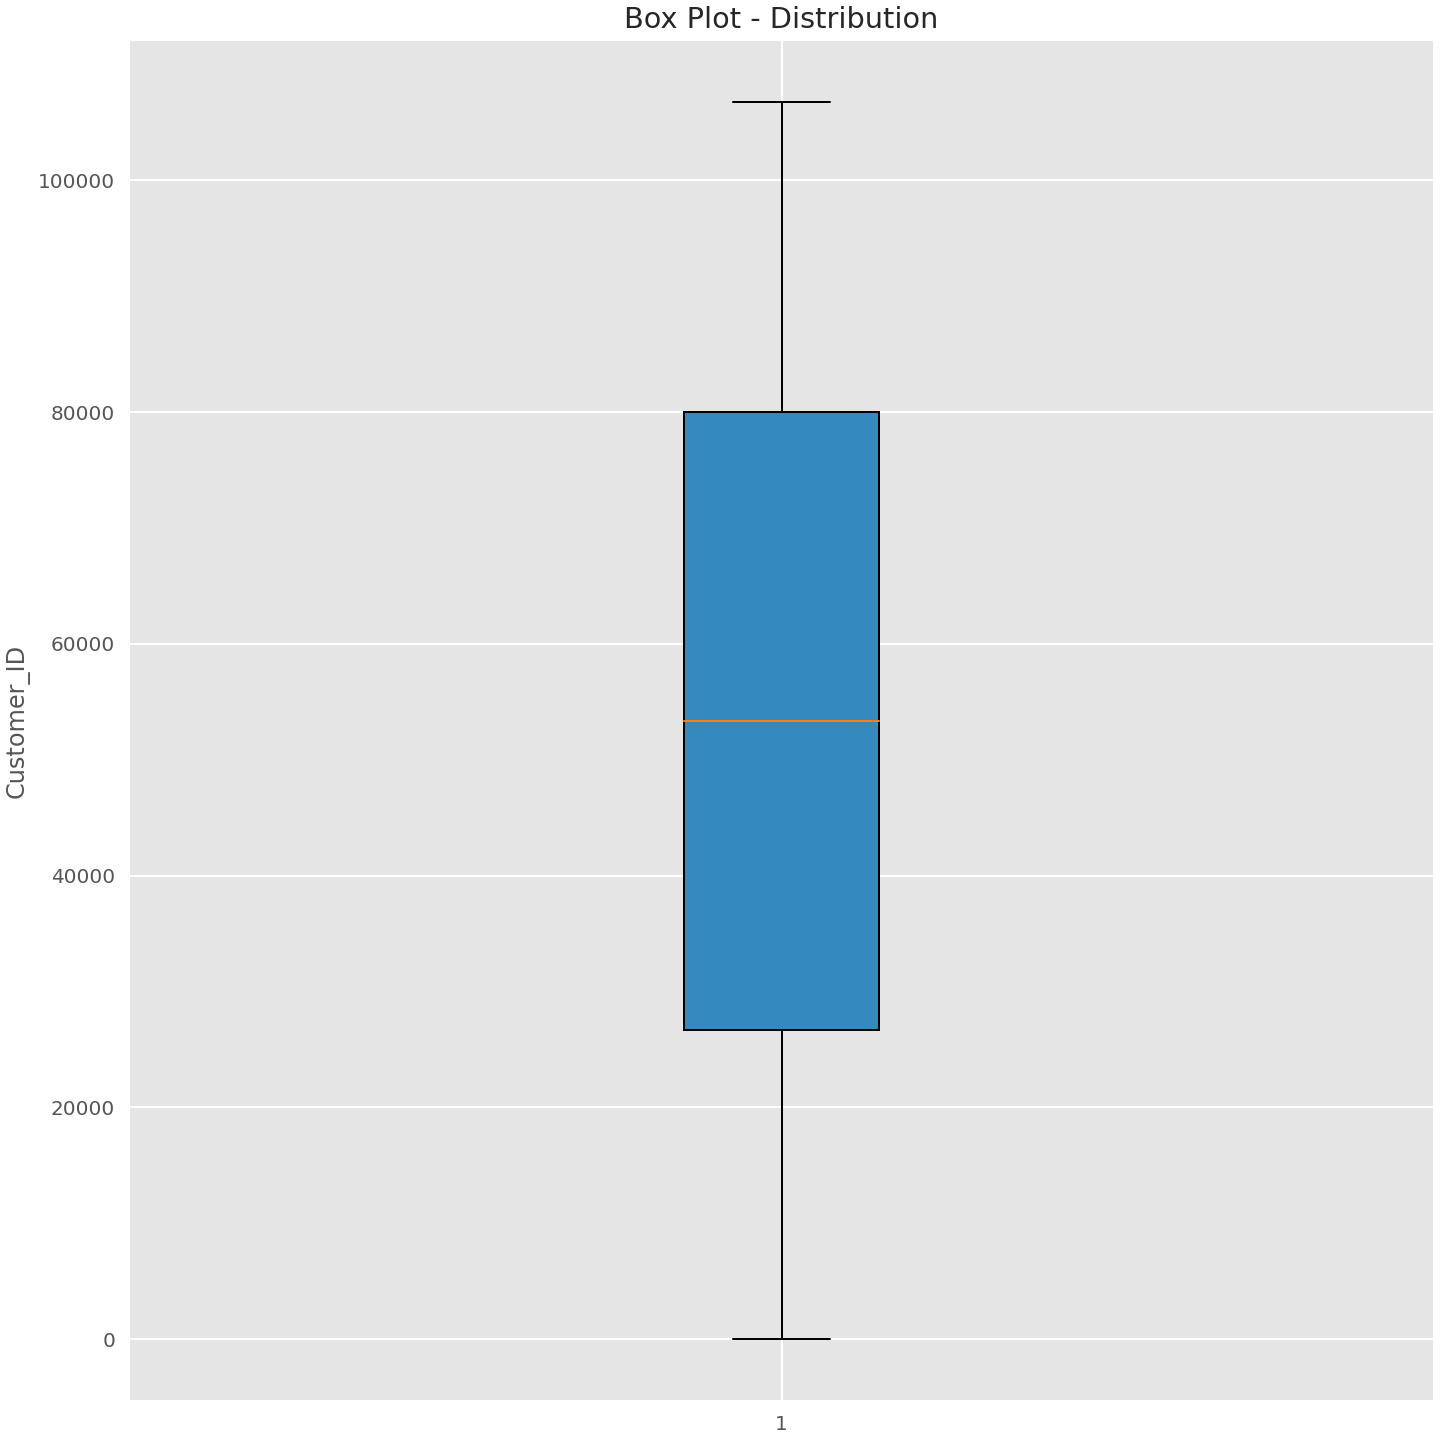

In [12]:
import panel as pn
pn.extension()

features = df_dash.drop(columns = ['Is_Canceled'], axis = 1)
kw = dict(plot1_f1 = features.columns)

dash1 = pn.interact(create_figure1, **kw)
dash1